## 初期設定

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 画像の読み込み
### カラーで読み込む

In [2]:
img = cv2.imread('./img/test1.jpg')
print(img.shape)

(668, 500, 3)


### グレースケールで読み込む

In [3]:
gray_img = cv2.imread('./img/test1.jpg', 0)
print(gray_img.shape)

(668, 500)


### 画像の表示

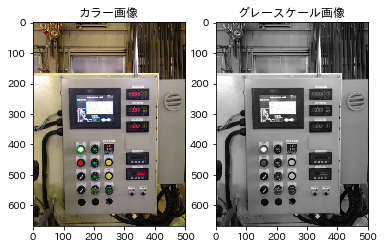

In [4]:
convert_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.title('カラー画像')
plt.imshow(convert_img)

plt.subplot(1,2,2)
plt.title('グレースケール画像')
plt.imshow(gray_img, cmap='gray')
plt.show()

## 色空間の変換

In [5]:
# BGR→YUV
yuv_img = cv2.cvtColor(img , cv2.COLOR_BGR2YUV)
# BGR→HSV
hsv_img = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)
# BGR→RGB
rgb_img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
# BGR→グレースケール
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)


## 拡大・縮小

(668, 500, 3)
(67, 50, 3)
(1336, 1000, 3)


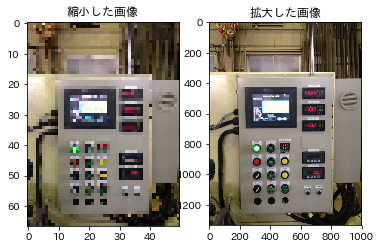

In [6]:
print(img.shape)
small_img = cv2.resize(rgb_img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_CUBIC)
print(small_img.shape)
big_img = cv2.resize(rgb_img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
print(big_img.shape)
plt.subplot(1,2,1)
plt.title('縮小した画像')
plt.imshow(small_img)

plt.subplot(1,2,2)
plt.title('拡大した画像')
plt.imshow(big_img)
plt.show()

## フィルタ処理

### ガウシアンフィルタ

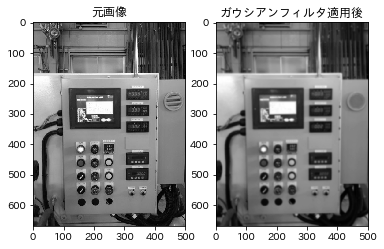

In [7]:
gaussian_img = cv2.GaussianBlur(gray_img,(11,11),0)

plt.subplot(1,2,1)
plt.title('元画像')
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('ガウシアンフィルタ適用後')
plt.imshow(gaussian_img, cmap='gray')
plt.show()

### Cannyフィルタ

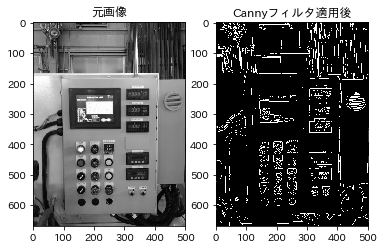

In [8]:
canny_img = cv2.Canny(gray_img, 100,200)

plt.subplot(1,2,1)
plt.title('元画像')
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Cannyフィルタ適用後')
plt.imshow(canny_img, cmap='gray')
plt.show()

### バイラテラルフィルタ

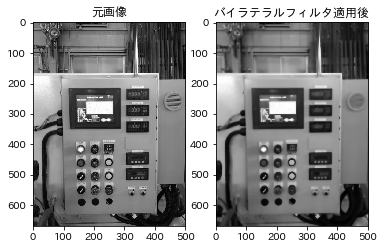

In [9]:
bilateral_img = cv2.bilateralFilter(gray_img,9,75,75)
plt.subplot(1,2,1)
plt.title('元画像')
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('バイラテラルフィルタ適用後')
plt.imshow(bilateral_img, cmap='gray')
plt.show()

## 画像の2値化

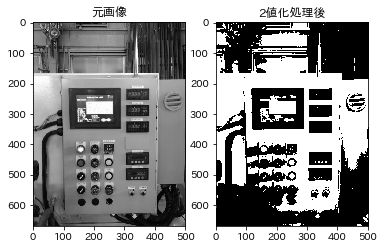

In [10]:
# 画像のしきい値処理を行う関数
ret, bi_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
# 画像の表示
plt.subplot(1,2,1)
plt.title('元画像')
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('2値化処理後')
plt.imshow(bi_img, cmap='gray')
plt.show()

## マスク処理

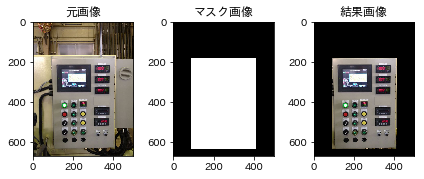

In [11]:
mask_img = cv2.imread('./img/mask.jpg')
masked_img = cv2.bitwise_and(convert_img, mask_img)
plt.subplot(1,3,1)
plt.title('元画像')
plt.imshow(convert_img)
plt.subplot(1,3,2)
plt.title('マスク画像')
plt.imshow(mask_img, cmap='gray')
plt.subplot(1,3,3)
plt.title('結果画像')
plt.imshow(masked_img)
plt.tight_layout()
plt.show()

## 色空間の変換としきい値処理による抽出

(460, 470)


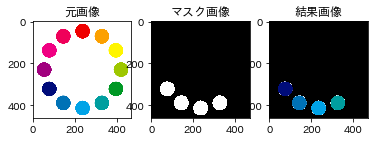

In [70]:
color_circle_img = hsv_img = cv2.cvtColor(cv2.imread('./img/munsell-color-system.png'), cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(color_circle_img, cv2.COLOR_RGB2HSV)

h_img = hsv_img[:, :, 0]
h, w, ch = color_circle_img.shape
mask_img2 = np.ones((h, w), dtype=np.uint8)
mask_img2[h_img < 90] = 0
mask_img2[h_img > 140] = 0
print(mask_img2.shape)

masked_img = cv2.bitwise_and(color_circle_img, color_circle_img, mask=mask_img2)

plt.subplot(1,3,1)
plt.title('元画像')
plt.imshow(color_circle_img)
plt.subplot(1,3,2)
plt.title('マスク画像')
plt.imshow(mask_img2, cmap='gray')
plt.subplot(1,3,3)
plt.title('結果画像')
plt.imshow(masked_img)
plt.show()

## 画像の保存